In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
excel_file = pd.ExcelFile("Ecommerce+Sales+Data.xlsx")

## Extract

In [3]:
sheet = excel_file.sheet_names[0]
df = excel_file.parse(sheet)

In [4]:
df.head()

,OrderDate,OrderNumber,ProductKey,SalespersonKey,Salesperson,Supervisor,Manager,Channel,Quantity,UnitPrice,Total,Month,Year
0,"Saturday, 15 January 2022",1492755.0,180.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,9.53,114.36,January,2022.0
1,"Thursday, 20 January 2022",1492618.0,661.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,3.52,42.24,January,2022.0
2,"Monday, 24 January 2022",1492834.0,278.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,3.54,42.48,January,2022.0
3,"Tuesday, 25 January 2022",1492801.0,1518.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,15.72,188.64,January,2022.0
4,"Tuesday, 1 February 2022",1501692.0,661.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,3.52,42.24,February,2022.0


## Transform

In [5]:
 df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')


In [6]:
# Check missing values before transformation
nulls_before = df.isnull().sum()
rows_before = len(df)
nulls_before

OrderDate            1
OrderNumber          1
ProductKey           1
SalespersonKey       1
Salesperson          1
Supervisor           1
Manager              1
Channel              1
Quantity             1
UnitPrice            1
Total             3015
Month                1
Year                 1
dtype: int64

In [7]:
# Drop rows with any nulls (cleaning)
df_cleaned = df.dropna()
df_cleaned

,OrderDate,OrderNumber,ProductKey,SalespersonKey,Salesperson,Supervisor,Manager,Channel,Quantity,UnitPrice,Total,Month,Year
0,2022-01-15,1492755.0,180.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,9.53,114.36,January,2022.0
1,2022-01-20,1492618.0,661.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,3.52,42.24,January,2022.0
2,2022-01-24,1492834.0,278.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,3.54,42.48,January,2022.0
3,2022-01-25,1492801.0,1518.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,15.72,188.64,January,2022.0
4,2022-02-01,1501692.0,661.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,12.0,3.52,42.24,February,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38567,2020-10-22,2075402.0,157.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,3.0,4.70,14.10,October,2020.0
38568,2020-10-23,2148884.0,157.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,3.0,5.07,15.21,October,2020.0
38569,2020-10-24,2118590.0,157.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,3.0,4.61,13.83,October,2020.0
38570,2020-10-25,2104650.0,157.0,215.0,Carla Ferreira,Diego Araujo,Victor Castro,Retail,3.0,4.67,14.01,October,2020.0


In [8]:
nulls_after = df_cleaned.isnull().sum()
rows_after = len(df_cleaned)
rows_after

38572

## Load

In [9]:
 df_cleaned.to_csv("Cleaned_Ecommerce_Data.csv", index=False)

In [10]:
stages = ['Extracted', 'After Transform', 'Loaded']
record_counts = [rows_before, rows_after, rows_after]
colors = ['#219ebc', '#ffb703', '#8ecae6']

## Visualization


Step 4: Visualize


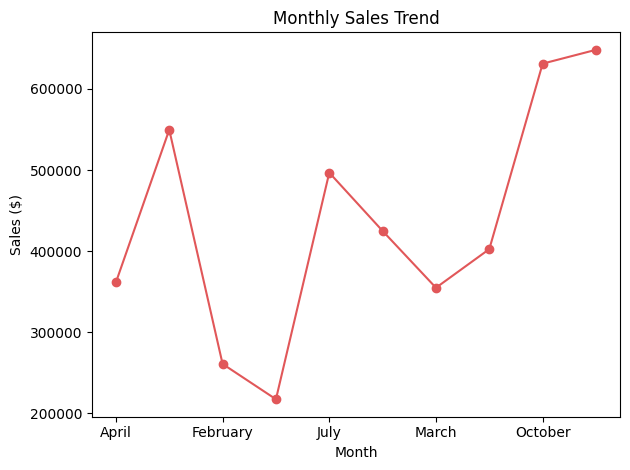

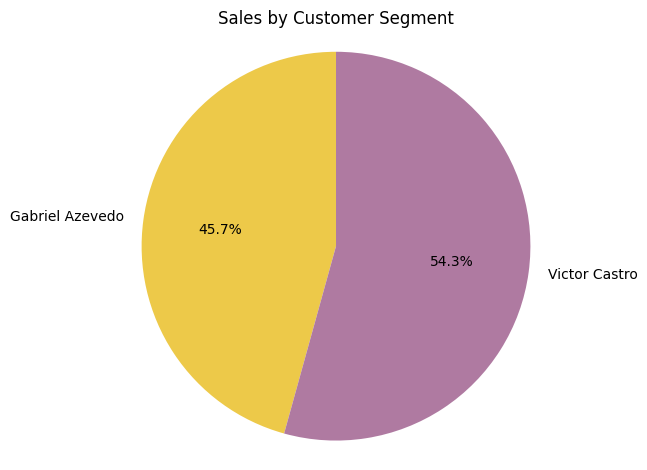

In [11]:
# Visualizations - just 4 key insights
print("\nStep 4: Visualize")
# 3. Monthly Sales Trend (bottom left)
# df_cleaned['Month'] = df_cleaned['OrderDate'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('Month')['Total'].sum()
monthly_sales.plot(marker='o', linestyle='-', color='#e15759')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.title('Monthly Sales Trend')
plt.tight_layout()
# plt.savefig('monthly_sales_trend.png')
plt.show()

# 4. Sales by Customer Segment (bottom right)
segment_sales = df_cleaned.groupby('Manager')['Total'].sum()
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', 
           startangle=90, colors=['#edc949', '#af7aa1', '#ff9da7'])
plt.title('Sales by Customer Segment')
plt.axis('equal')
plt.tight_layout()
# plt.savefig('sales_by_customer_segment.png')
plt.show()